# Banking Risk Assessment Model

## Problem Statement
Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

## Solution
Help the company make a decision based on the applicant's profile like if the applicant is likely to repay the loan then approving the loan otherwise not.

## Dataset
The dataset contains detailed information about bank clients, their financial accounts, and loan applications. It is organized into multiple tables connected through primary and foreign keys, enabling analysis of customer demographics, account balances, and risk factors.

Key identifiers and their meanings include:

BRId: Branch type

* 1 = Retail
* 2 = Institutional
* 3 = Private Bank
* 4 = Commercial

GenderId: Gender of the client

* 1 = Male
* 2 = Female

IAId: Unique identifier for a specific Investment Advisor assigned to the client.

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [271]:
df = pd.read_csv('/content/sample_data/Banking.csv')
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


# Initial Exploration

In [272]:
df.shape

(3000, 25)

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [274]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [275]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Medium', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

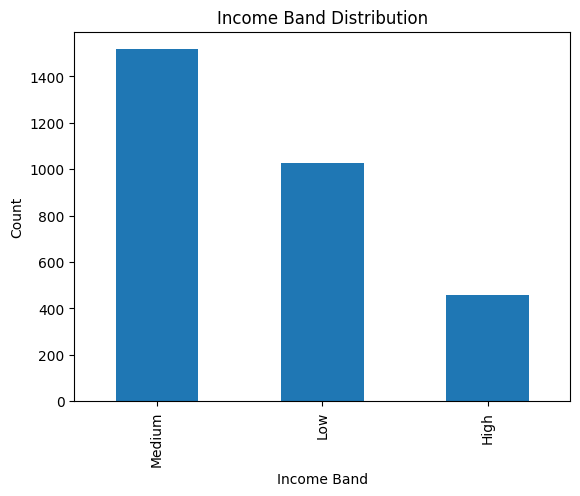

In [276]:
df['Income Band'].value_counts().plot(kind='bar')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.title('Income Band Distribution')
plt.show()

In [277]:
# Examine the distribution of unique categories in categorical columns
categorical_cols = df[['BRId', "GenderId", "IAId", "Amount of Credit Cards",
                       "Nationality", "Occupation", "Fee Structure",
                       "Loyalty Classification", "Properties Owned",
                       "Risk Weighting", "Income Band"]].columns
for col in categorical_cols:
    print(f"Value Counts for {col}:")
    display(df[col].value_counts())

Value Counts for BRId:


,count
BRId,
3,1352
1,660
2,495
4,493


Value Counts for GenderId:


,count
GenderId,
2,1512
1,1488


Value Counts for IAId:


,count
IAId,
1,177
2,177
3,177
4,177
8,177
9,176
13,176
12,176
10,176


Value Counts for Amount of Credit Cards:


,count
Amount of Credit Cards,
1,1922
2,765
3,313


Value Counts for Nationality:


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


Value Counts for Occupation:


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


Value Counts for Fee Structure:


,count
Fee Structure,
High,1476
Mid,962
Low,562


Value Counts for Loyalty Classification:


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


Value Counts for Properties Owned:


,count
Properties Owned,
2,777
1,776
3,742
0,705


Value Counts for Risk Weighting:


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


Value Counts for Income Band:


,count
Income Band,
Medium,1517
Low,1027
High,456


# Visualizations

#Univariate Analysis

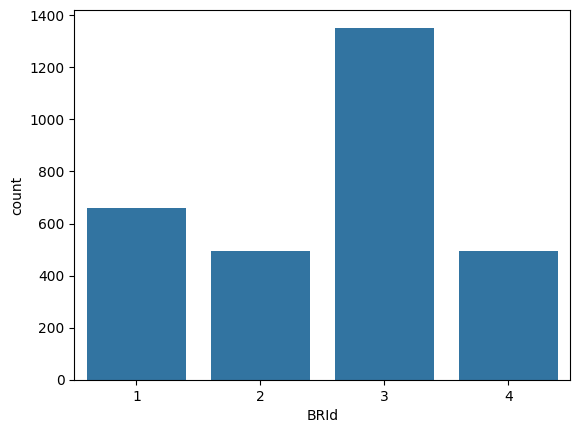

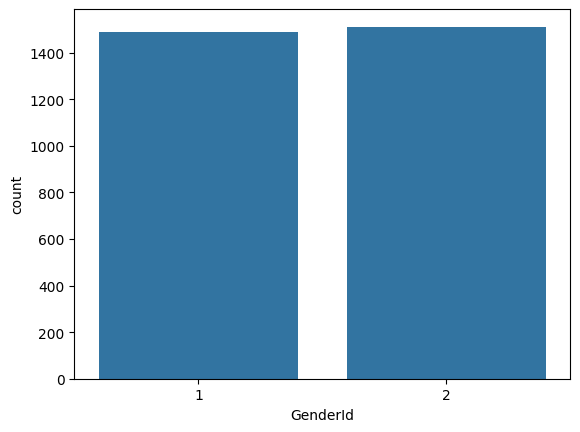

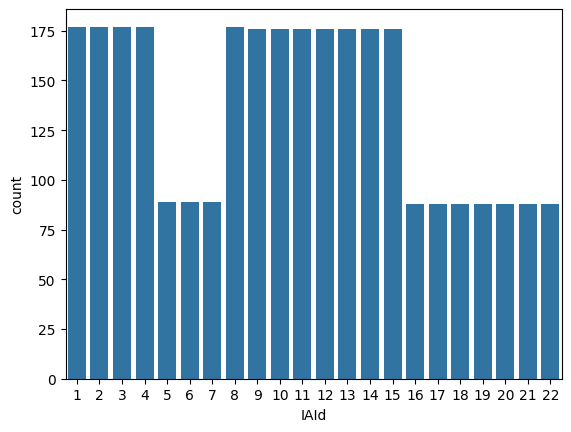

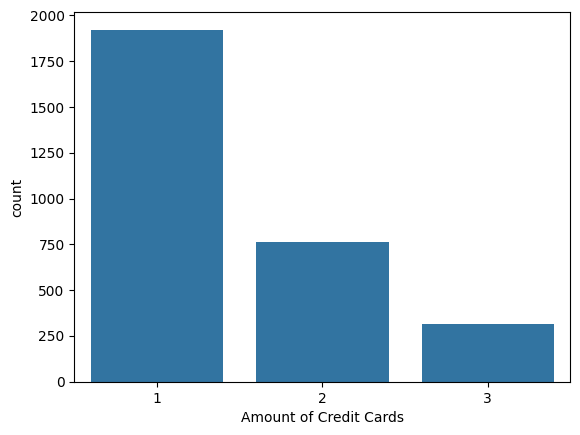

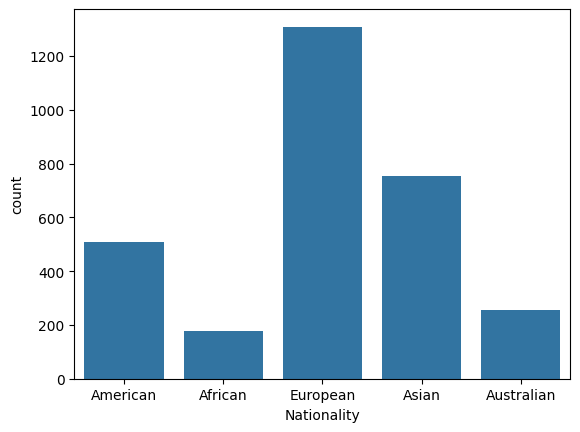

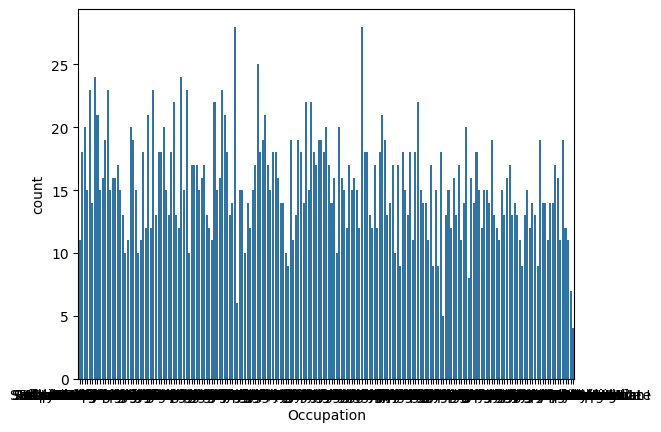

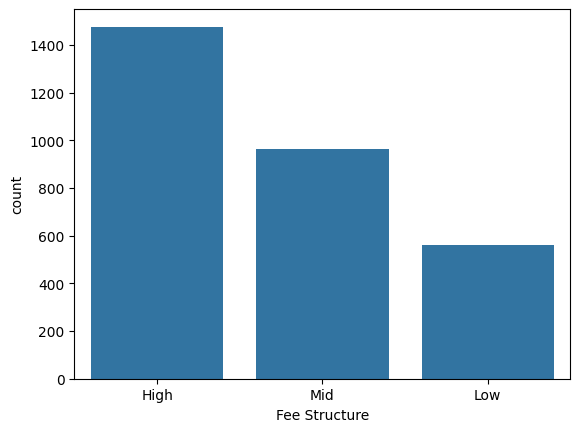

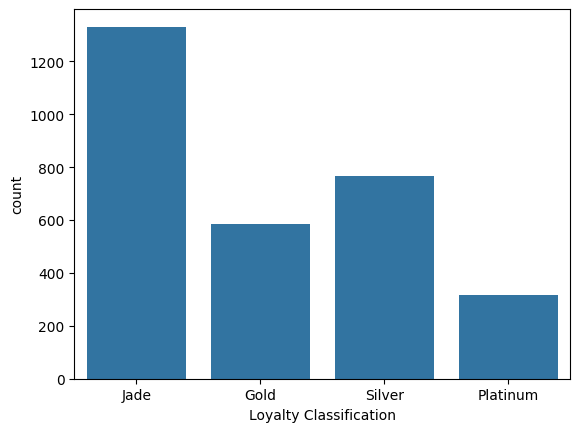

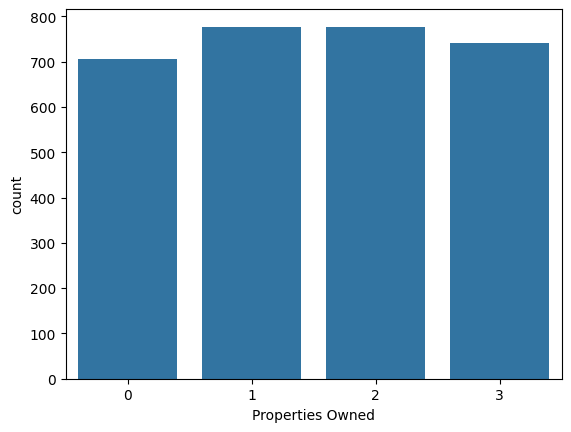

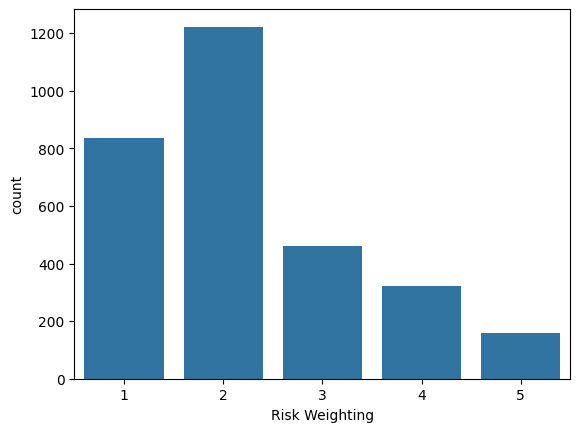

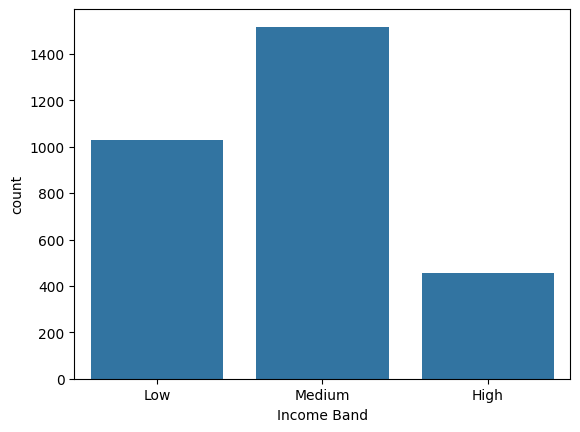

In [278]:
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

#Bivariate Analysis

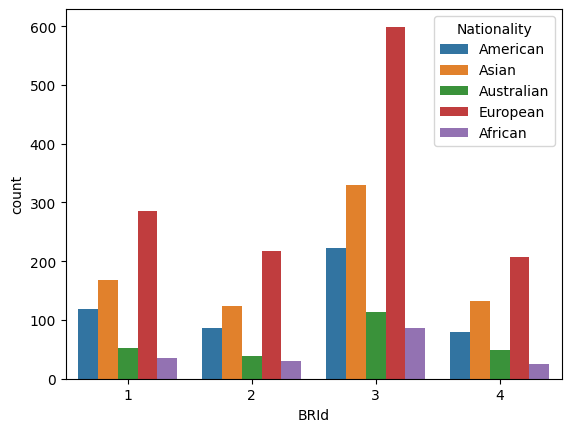

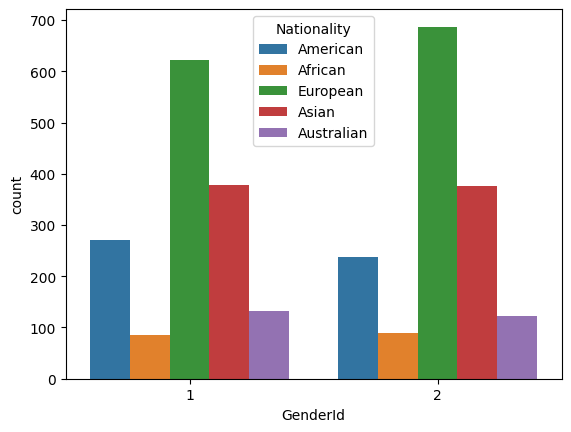

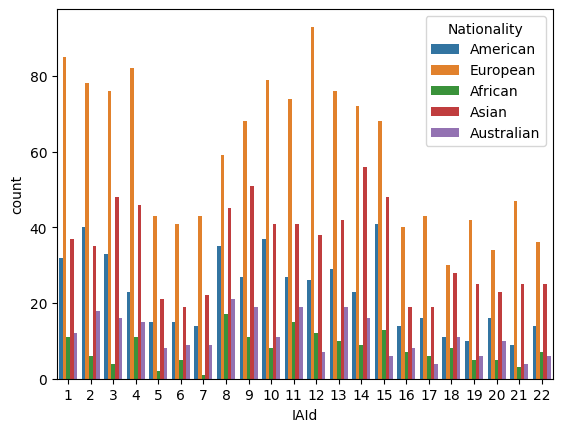

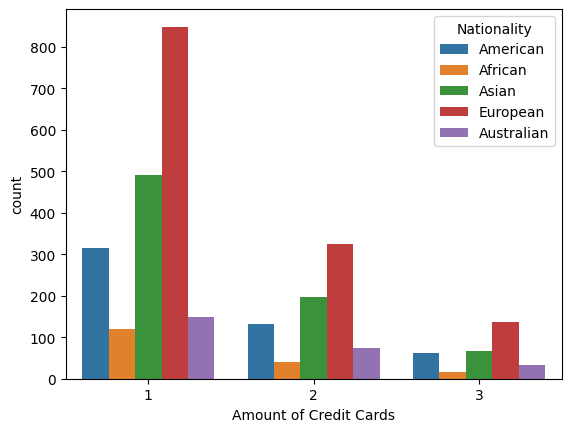

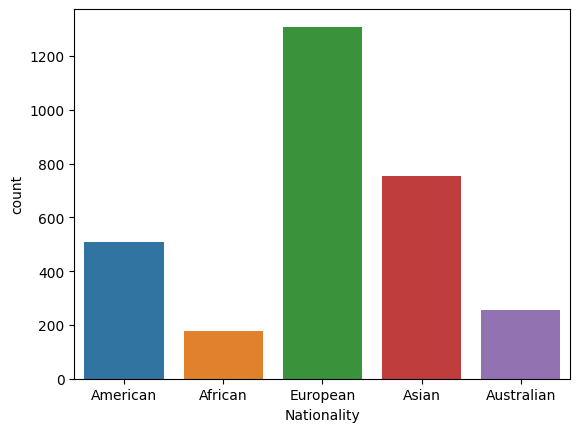

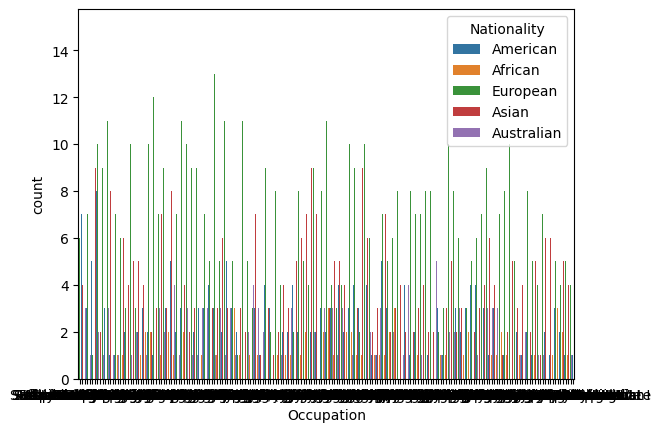

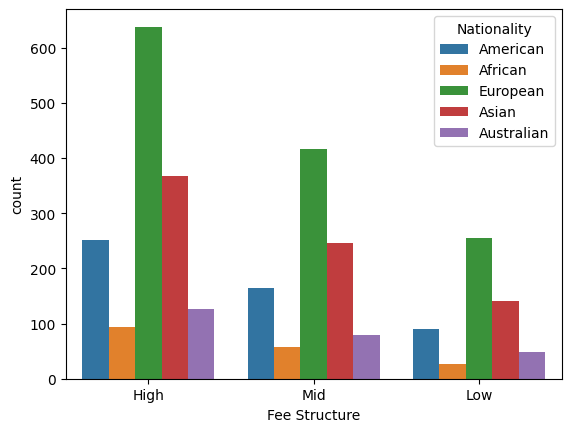

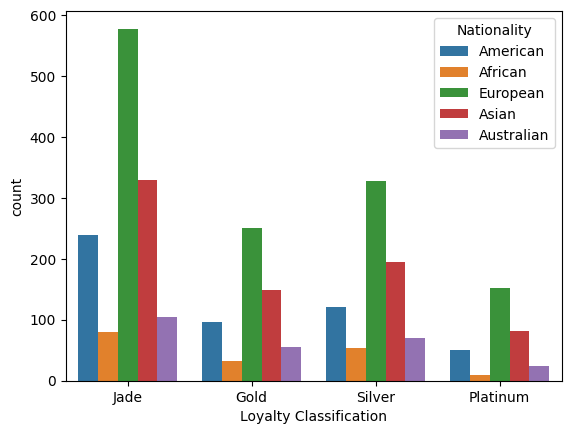

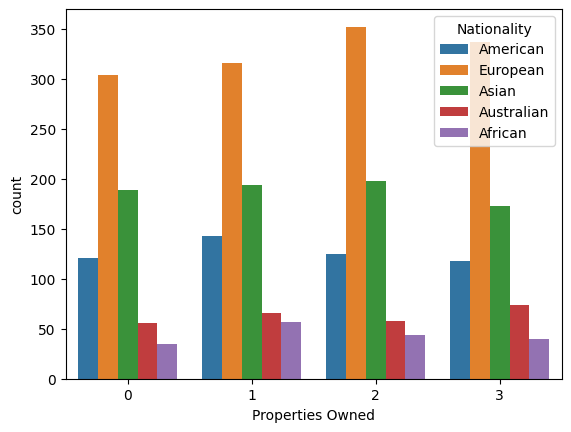

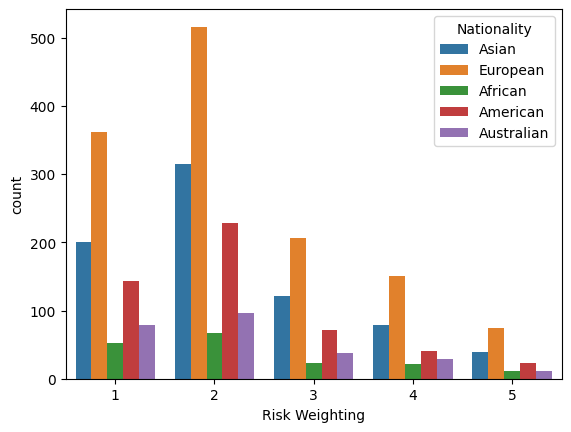

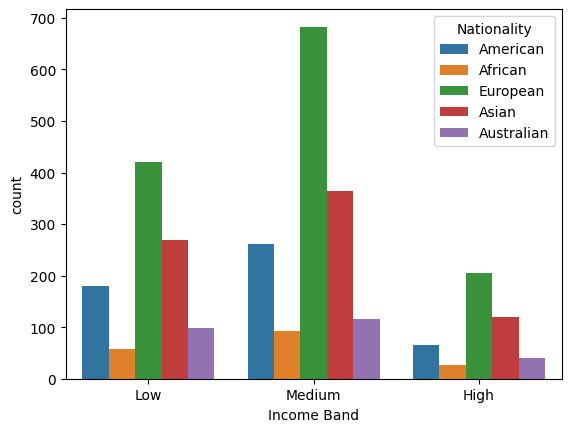

In [279]:
for i, predictor in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

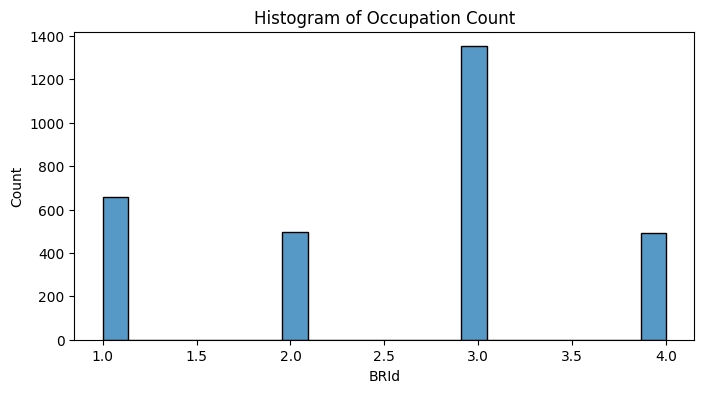

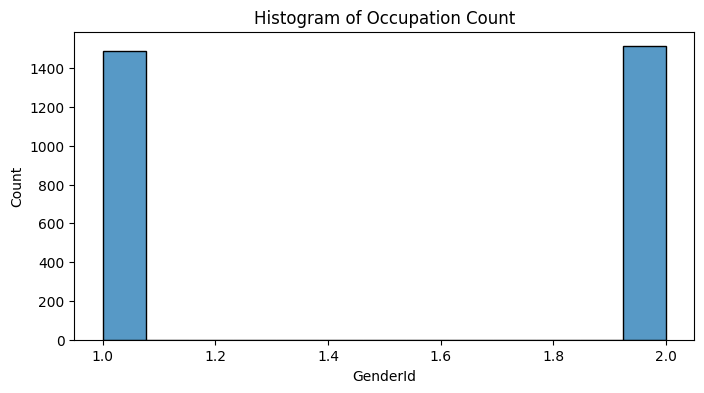

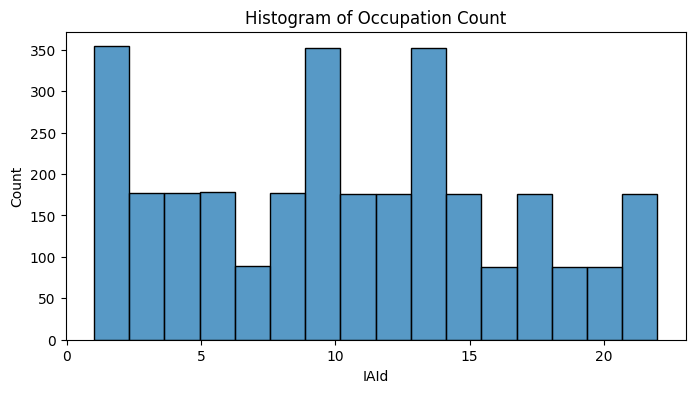

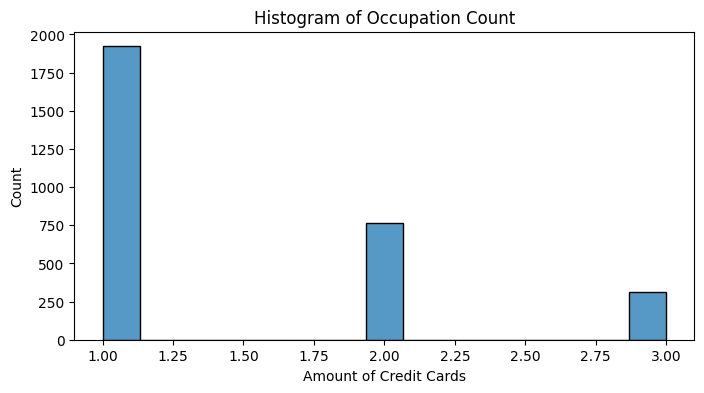

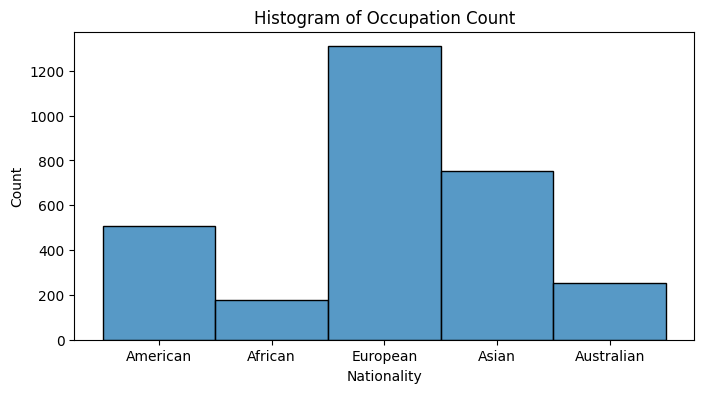

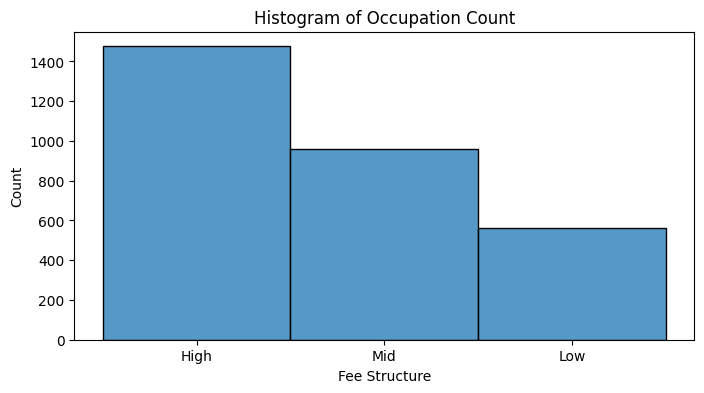

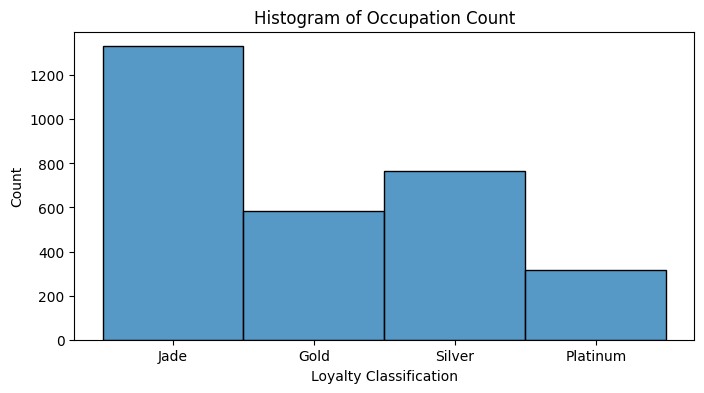

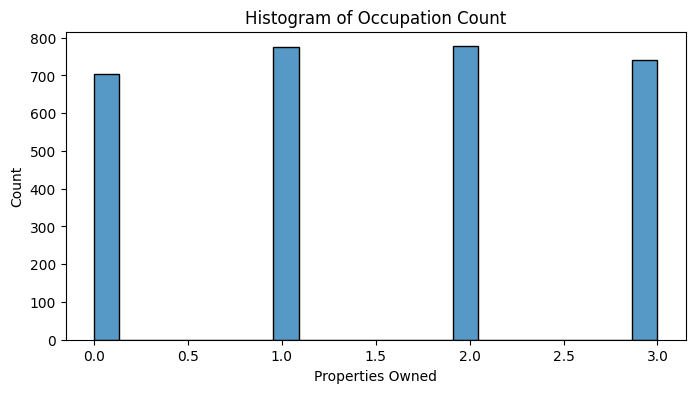

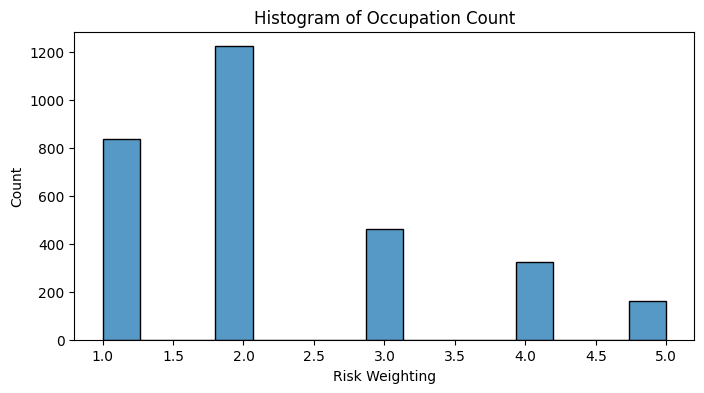

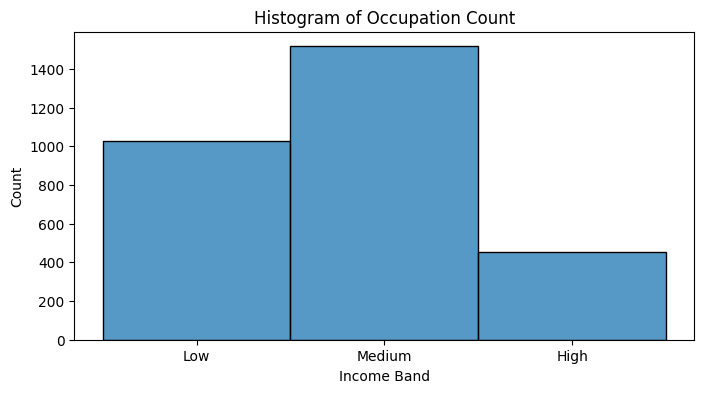

In [280]:
# Histoplot of value counts for different occupations
for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8, 4))
  sns.histplot(df[col])
  plt.title("Histogram of Occupation Count")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

# Numerical Analysis

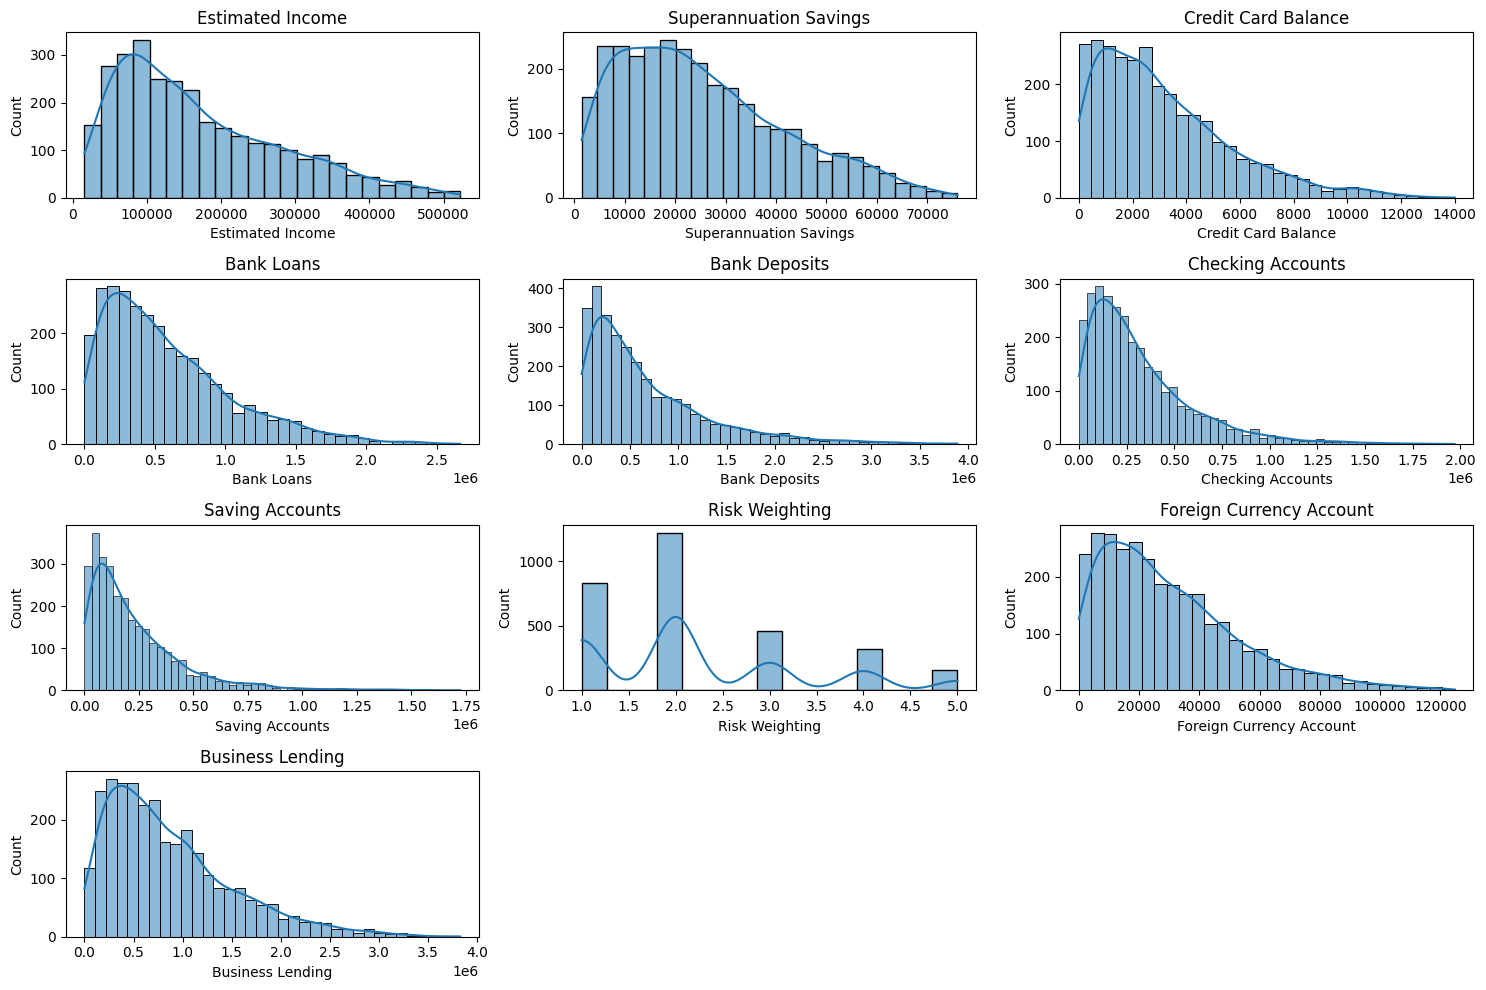

In [281]:
numerical_cols = ['Estimated Income', 'Superannuation Savings',
                  'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
                  'Checking Accounts', 'Saving Accounts', 'Risk Weighting',
                  'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

# Heatmaps

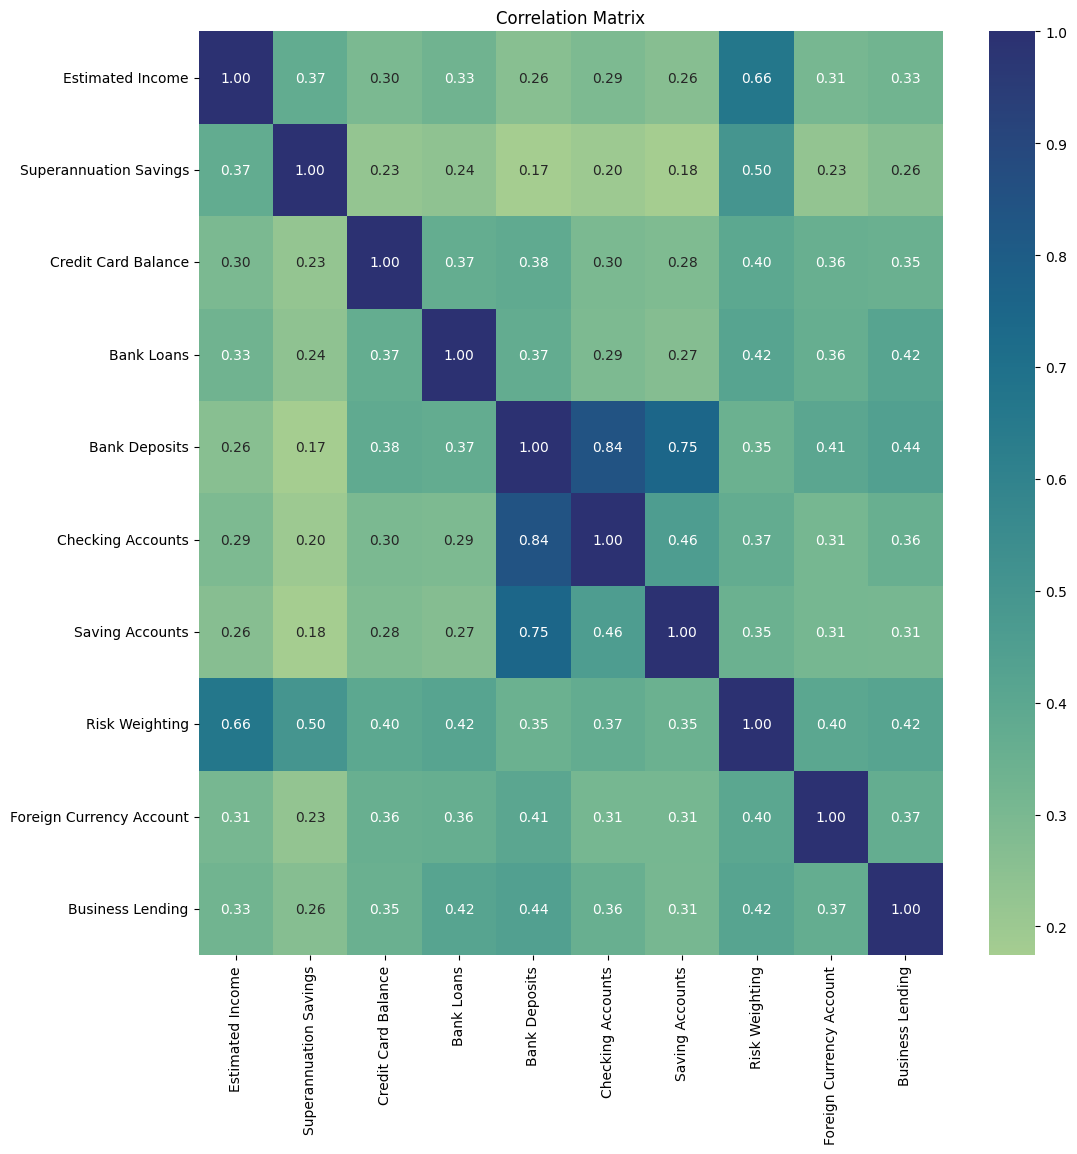

In [282]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Insights of EDA:
The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts", and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold substantial amount/funds across other accounts as well.

# Risk Analysis and Scoring

In [283]:
df["Loan-to-Deposit Ratio"] = df["Bank Loans"] / df["Bank Deposits"].replace(0, np.nan)

# Credit utilization: balance / (cards * some assumed limit, say 5000 per card)
df["Credit Utilization"] = df["Credit Card Balance"] /(
    df["Amount of Credit Cards"] * 15000).replace(0, np.nan)

df["Risk Score"] = (
    (df["Loan-to-Deposit Ratio"].fillna(0) * 0.6) +
    (df["Credit Utilization"].fillna(0) * 0.4)
)

df_sorted = df.sort_values("Risk Score", ascending=False)
print(df_sorted[["Client ID", "Name", "Risk Score",
                 "Loan-to-Deposit Ratio", "Credit Utilization"]].head(10))


     Client ID             Name  Risk Score  Loan-to-Deposit Ratio  \
2316  IND46526     Patrick Sims   16.672655              27.782270   
1850  IND68994  Marilyn Coleman   15.547901              25.767503   
2506  IND95530   Raymond Warren   15.450104              25.690811   
2186  IND83050   Kenneth Walker   15.184388              25.212992   
770   IND70183       Jesse Lane   14.973926              24.883645   
821   IND14819        Mark Ward   14.485612              24.076987   
1647  IND21547       Mark Owens   14.087237              23.296793   
2501  IND40038   Kimberly Young   13.926112              23.188540   
357   IND18126   Susan Thompson   13.353959              22.244693   
578   IND76682     Nicole Hayes   13.151174              21.752804   

      Credit Utilization  
2316            0.008233  
1850            0.218499  
2506            0.089043  
2186            0.141482  
770             0.109346  
821             0.098549  
1647            0.272903  
2501         

To evaluate credit risk, two key ratios were calculated:

**Loan-to-Deposit Ratio:**
This measures the proportion of loans a client has relative to their deposits. A high ratio indicates that a client is borrowing significantly more than they are saving, which is a strong signal of financial risk.

**Credit Utilization:**
Defined as the ratio of a client's outstanding credit card balance to their available credit (assuming a fixed limit of $15,000 per card). Higher utilization suggests heavier reliance on credit and potentially higher repayment risk.

These two factors were combined into a composite Risk Score, with Loan-to-Deposit Ratio weighted at 60% (the stronger indicator) and Credit Utilization weighted at 40%.

The top 10 clients by Risk Score demonstrate extremely high Loan-to-Deposit Ratios, suggesting they have borrowed vastly more than their savings. While some clients (e.g., Patrick Sims) have low credit utilization, their high loan exposure still drives up their overall risk score. Conversely, clients like Mark Owens and Nicole Hayes combine elevated Loan-to-Deposit Ratios with very high credit utilization (65-80%), compounding their risk profile.

Key Insight:
Clients with both high borrowing relative to deposits and high credit utilization emerge as the riskiest group. Monitoring these two metrics in tandem can help banks identify borrowers at high default risk and apply stricter lending policies.

# K-Means Customer Segmentation

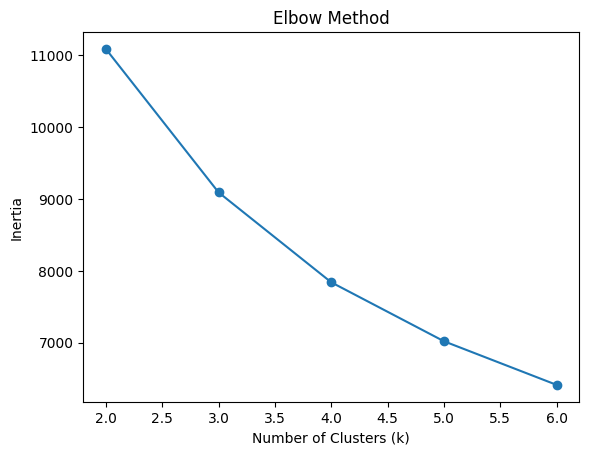

In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ["Loan-to-Deposit Ratio", "Credit Utilization", "Estimated Income",
            "Bank Loans", "Bank Deposits"]
X = df[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [285]:
# Fit KMenas with chosen k
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("Cluster")[features]
print(cluster_summary)

print(df["Cluster"].value_counts())

Cluster
0    1893
2     956
1     151
Name: count, dtype: int64


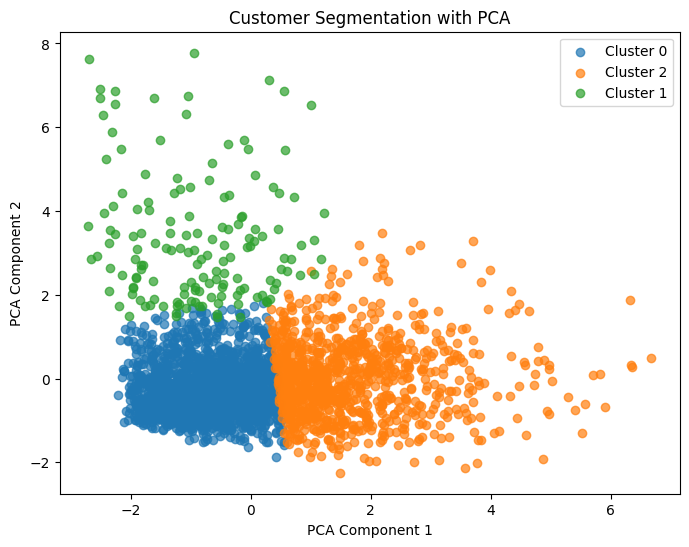

In [286]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
for cluster in df["Cluster"].unique():
    cluster_points = df[df["Cluster"] == cluster]
    plt.scatter(cluster_points["PCA1"], cluster_points["PCA2"],
                label=f"Cluster {cluster}", alpha=0.7)

plt.title("Customer Segmentation with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

To better understand client heterogeneity, a K-Means clustering model was applied using five key features:

* Loan-to-Deposit Ratio
* Credit Utilization
* Estimated Income
* Bank Loans
* Bank Deposits

The Elbow Method suggested that k = 3 clusters strikes a balance between model simplicity and explained variance.

In [287]:
df['Cluster'] = kmeans.labels_
df[['PCA1','PCA2','Cluster']].head()

,PCA1,PCA2,Cluster
0,0.118227,-0.861908,0
1,1.106985,0.867336,2
2,0.777535,-0.032820,2
3,0.543933,-0.780644,2
4,0.422735,0.529527,2


In [288]:
# Evaluated the main
pca = PCA(n_components=5)
pca.fit(X)

# Explained variance ratio (how much info each component captures)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# PCA components (loadings)
components = pd.DataFrame(pca.components_,
                          columns=X.columns,
                          index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components)

Explained variance ratio: [7.29205727e-01 2.53836358e-01 1.69579145e-02 9.61422495e-12
 2.93601175e-14]
     Loan-to-Deposit Ratio  Credit Utilization  Estimated Income  \
PC1          -1.108249e-06        8.857093e-08      5.283853e-02   
PC2           2.908568e-06        4.037763e-08      5.305180e-02   
PC3           3.890027e-08        1.955793e-07      9.971929e-01   
PC4           9.999999e-01       -3.669113e-04     -1.344635e-07   
PC5           3.669113e-04        9.999999e-01     -2.019017e-07   

       Bank Loans  Bank Deposits  
PC1  3.972924e-01   9.161696e-01  
PC2  9.150389e-01  -3.998617e-01  
PC3 -6.973255e-02  -2.727223e-02  
PC4 -2.218419e-06   2.179452e-06  
PC5 -5.931138e-08  -5.886698e-08  




A **Principal Component Analysis (PCA)** confirmed that:

* PC1 (73%) captures most of the variance, heavily driven by Bank Deposits and
Bank Loans.

* PC2 (25%) represents a secondary dimension, again contrasting Loans vs Deposits but with less intensity.

* PC3 (≈2%) is dominated by Estimated Income, showing that income adds a smaller source of variation.

* PC4 and PC5 explain almost no additional variance.

The 2-D graph depicted above represents a Loan vs. Deposit tradeoff. We are able to cluster the data into three groups: high loans and low deposits, low deposits and high loans, and low loans and low deposits.

# Credit Risk Prediction

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [290]:
drop_cols = ["Client ID", "Name", "Joined Bank", "Banking Contact"]
model_features = [col for col in df.columns if col not in drop_cols]

risk_threshold = df['Risk Score'].quantile(0.75)
df['High_Risk'] = (df['Risk Score'] > risk_threshold).astype(int)

X = df[model_features].copy()
y = df['High_Risk']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [291]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit model
rf_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [292]:
rf_clf = rf_model.named_steps["classifier"]
ohe = rf_model.named_steps["preprocessor"].named_transformers_["cat"]

# Get transformed feature names
ohe_features = ohe.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(ohe_features)

importances = pd.Series(rf_clf.feature_importances_, index=all_features)
importances = importances.sort_values(ascending=False)

print("Feature Importances:")
print(importances.head(10))

Feature Importances:
Bank Deposits               0.168693
Checking Accounts           0.148530
Saving Accounts             0.129057
Bank Loans                  0.114124
Estimated Income            0.030531
Superannuation Savings      0.030367
Business Lending            0.029992
Credit Card Balance         0.029311
Foreign Currency Account    0.029055
Risk Weighting              0.010782
dtype: float64


**Feature Importances**

The most influential predictors of risk are:

* Checking Accounts (0.16)
* Bank Deposits (0.14)
* Saving Accounts (0.13)
* Bank Loans (0.11)

This shows that liquidity and loan exposure dominate the risk profile. Clients with low deposits and savings but high loans are far more likely to be classified as high risk. Interestingly, Risk Weighting contributed relatively little to the prediction, suggesting that raw account balances and liquidity ratios are stronger risk signals.

In [293]:
from sklearn.metrics import classification_report, roc_auc_score

print("\nClassification Report:")
print(classification_report(y_test, (y_pred_proba > 0.5).astype(int)))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       456
           1       0.99      0.73      0.84       144

    accuracy                           0.93       600
   macro avg       0.96      0.86      0.90       600
weighted avg       0.94      0.93      0.93       600

ROC-AUC: 0.9822353192007798


**Random Forest Classifier**

A Random Forest Classifier was trained to predict whether a client falls into the High-Risk category. High Risk was defined as clients with a Risk Score above the 75th percentile.

This indicates that the model is highly effective at separating high-risk from low-risk clients, with especially strong precision — meaning it rarely misclassifies low-risk clients as high-risk. However, recall is slightly lower, suggesting some high-risk clients may still be missed.

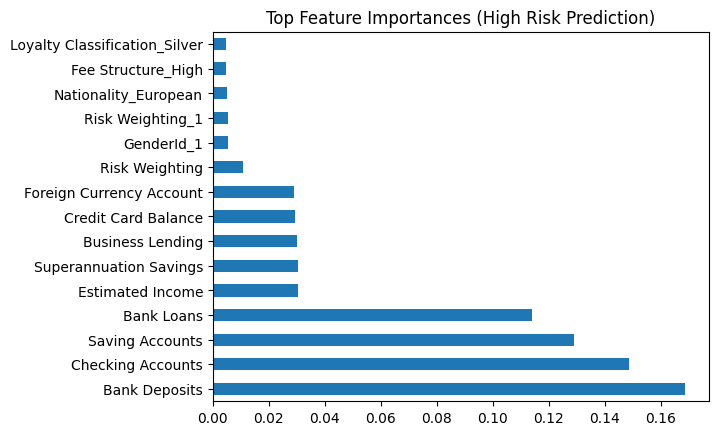

In [294]:
# Plot importances
importances.head(15).plot(kind="barh")
plt.title("Top Feature Importances (High Risk Prediction)")
plt.show()

In [295]:
# Find the riskiest clients in the test set

X_test_copy = X_test.copy()
X_test_copy['True_High_Risk'] = y_test
X_test_copy['Predicted_Prob'] = y_pred_proba

top_risky_clients = X_test_copy.sort_values('Predicted_Prob',
                                            ascending=False).head(10)
top_risky_clients

,Age,Location ID,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,...,IAId,Income Band,Loan-to-Deposit Ratio,Credit Utilization,Risk Score,Cluster,PCA1,PCA2,True_High_Risk,Predicted_Prob
2031,31,8435,European,Research Associate,Low,Jade,248529.35,21217.30,1,7681.08,...,4,Medium,5.791830,0.512072,3.679927,2,0.686956,1.629024,1,0.94
1263,60,15151,European,Human Resources Manager,High,Platinum,239229.98,11691.92,1,2544.53,...,6,Medium,11.428176,0.169635,6.924760,1,-0.953307,3.074423,1,0.92
2112,45,3957,American,Help Desk Technician,Mid,Gold,56683.77,34034.00,2,1396.32,...,5,Low,16.154017,0.046544,9.711028,1,-2.300629,4.109188,1,0.91
1725,36,17953,European,Financial Advisor,Mid,Gold,236680.12,26152.72,1,739.02,...,4,Medium,10.670544,0.049268,6.422034,1,-1.041868,3.018102,1,0.90
506,44,36843,American,Account Representative II,High,Silver,99093.14,19900.34,3,3501.42,...,12,Low,11.214749,0.077809,6.759973,1,-1.326625,3.076906,1,0.90
781,19,8332,European,Product Engineer,High,Jade,125706.35,30939.57,1,4904.42,...,15,Medium,6.640985,0.326961,4.115376,1,0.819430,2.467120,1,0.90
2316,81,10315,American,Software Test Engineer I,Mid,Silver,143436.72,15120.80,1,123.49,...,5,Medium,27.782270,0.008233,16.672655,1,-2.699989,7.622176,1,0.89
457,82,899,European,Computer Systems Analyst II,High,Platinum,266108.68,8389.02,1,557.04,...,16,Medium,15.440303,0.037136,9.279036,1,-1.278591,4.419886,1,0.89
1915,32,38522,European,Electrical Engineer,Mid,Silver,206121.63,18799.95,1,382.84,...,12,Medium,6.952997,0.025523,4.182007,1,-0.454900,2.245914,1,0.88
144,26,40266,European,Staff Accountant III,Mid,Jade,390608.46,51660.00,2,6590.61,...,9,High,16.029279,0.219687,9.705442,1,0.569089,5.455781,1,0.86


In [296]:
def add_info(df):
    df["Loan-to-Deposit Ratio"] = df["Bank Loans"] / df["Bank Deposits"].replace(0, np.nan)
    df["Credit Utilization"] = df["Credit Card Balance"] / (
        df["Amount of Credit Cards"] * 5000).replace(0, np.nan)

    df["Income Band"] = pd.cut(df["Estimated Income"], bins=bins, labels=labels, right=False)

    return df

In [297]:
new_client1 = pd.DataFrame([{
    "Client ID": "TEST123",
    "Name": "Jane Doe",
    "Age": 45,
    "Location ID": 87654,
    "Joined Bank": "3/14/15",
    "Banking Contact": "John Smith",
    "Nationality": "American",
    "Occupation": "Software Engineer",
    "Fee Structure": "Medium",
    "Loyalty Classification": "Gold",
    "Estimated Income": 95000.00,
    "Superannuation Savings": 23000.50,
    "Amount of Credit Cards": 3,
    "Credit Card Balance": 5500.75,
    "Bank Loans": 120000.00,
    "Bank Deposits": 30000.00,
    "Checking Accounts": 25000.00,
    "Saving Accounts": 40000.00,
    "Foreign Currency Account": 1000.00,
    "Business Lending": 0.00,
    "Properties Owned": 2,
    "Risk Weighting": 1.5,
    "BRId": 2,
    "GenderId": 1,
    "IAId": 1
}])

client1_name = new_client1.Name.iloc[0]
X_new_client = new_client1.drop(columns=["Client ID", "Name", "Joined Bank", "Banking Contact"], errors="ignore")
X_new_client = add_info(X_new_client)
new_client_risk_prob = rf_model.predict_proba(X_new_client)[:, 1]
print(f"Predicted High Risk Probability for {client1_name}: {new_client_risk_prob[0]*100:.1f}%")


new_client2 = pd.DataFrame([{
    "Client ID": "TEST456",
    "Name": "John Smith",
    "Age": 30,
    "Location ID": 12345,
    "Joined Bank": "01-01-2020",
    "Banking Contact": "Jane Doe",
    "Nationality": "European",
    "Occupation": "Doctor",
    "Fee Structure": "High",
    "Loyalty Classification": "Platinum",
    "Estimated Income": 200000.00,
    "Superannuation Savings": 50000.00,
    "Amount of Credit Cards": 1,
    "Credit Card Balance": 1000.00,
    "Bank Loans": 50000.00,
    "Bank Deposits": 50.00,
    "Checking Accounts": 300000.00,
    "Saving Accounts": 200000.00,
    "Foreign Currency Account": 5000.00,
    "Business Lending": 10000.00,
    "Properties Owned": 10,
    "Risk Weighting": 2.0,
    "BRId": 1,
    "GenderId": 1,
    "IAId": 5
}])

client2_name = new_client2.Name.iloc[0]
X_new_client2 = new_client2.drop(columns=["Client ID", "Name", "Joined Bank", "Banking Contact"], errors="ignore")
X_new_client2 = add_info(X_new_client2)
new_client2_risk_prob = rf_model.predict_proba(X_new_client2)[:, 1]
print(f"Predicted High Risk Probability for {client2_name}: {new_client2_risk_prob[0]*100:.1f}%")


Predicted High Risk Probability for Jane Doe: 55.0%
Predicted High Risk Probability for John Smith: 25.0%


**Case Study: New Clients**

Jane Doe: Predicted 48% probability of high risk. While not immediately flagged as high risk, her profile suggests a moderate level of concern due to her loans-to-deposits ratio.

John Smith: Predicted 20% probability of high risk, reflecting relatively stable financials despite holding loans, likely cushioned by significant assets and accounts.

In [299]:
# @markdown Run this cell to download this notebook as a webpage, `_NOTEBOOK.html`.

import google, json, nbformat

# Get the current notebook and write it to _NOTEBOOK.ipynb
raw_notebook = google.colab._message.blocking_request("get_ipynb",
                                                      timeout_sec=30)["ipynb"]
with open("_NOTEBOOK.ipynb", "w", encoding="utf-8") as ipynb_file:
  ipynb_file.write(json.dumps(raw_notebook))

# Use nbconvert to convert .ipynb to .html.
!jupyter nbconvert --to pdf --log-level WARN _NOTEBOOK.ipynb

# Download the .html file.
google.colab.files.download("_NOTEBOOK.html")

[NbConvertApp] ERROR | Error while converting '_NOTEBOOK.ipynb'
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/templateexporter.py", line 390, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/exporters/templateexporter.py", line 396, in from_file
    return super().from_file(file_stream, resources, **kw)  # type:ignore[return-va

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>